In [ ]:
# import package
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Load the dataset
data_url = "https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true"
df = pd.read_csv(data_url)

# Splitting the data into training and testing sets as per your logic
# Assuming 'flag' and 'y' are column names for splitting and the target variable, respectively
train_data = df[df['flag'] == 'train'].drop(['flag'], axis=1)
test_data = df[df['flag'] == 'test'].drop(['flag'], axis=1)

X_train = train_data.drop(['y'], axis=1)  # Adjust 'y' if your target column name is different
y_train = train_data['y']
X_test = test_data.drop(['y'], axis=1)
y_test = test_data['y']



In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align X_train and X_test to ensure they have the same columns
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)
X_train

,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,...,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,workclass_bin_a. no income,workclass_bin_b. income,age_bin_a. 0-25,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55
0,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
32557,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32558,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
32559,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0


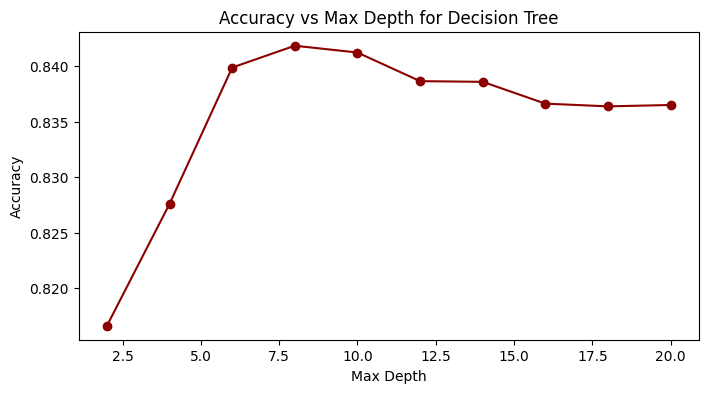

In [ ]:
results = []
max_depth_options = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

# Make sure x_train, y_train, x_test, and y_test are defined and correctly preprocessed.
for depth in max_depth_options:
    model = DecisionTreeClassifier(max_depth=depth, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)

plt.figure(figsize=(8, 4))
pd.Series(results, max_depth_options).plot(color="darkred", marker="o")
plt.title('Accuracy vs Max Depth for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

# Define your function for evaluating models here
def evaluate_estimators(model_class, X_train, y_train, X_test, y_test, n_estimators_range):
    accuracies, aucs = [], []
    for n_estimators in n_estimators_range:
        model = model_class(n_estimators=n_estimators)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, predictions))
        aucs.append(roc_auc_score(y_test, predictions))

    # Plotting logic here

n_estimators_range = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Example: Evaluating Random Forest
evaluate_estimators(RandomForestClassifier, X_train, y_train, X_test, y_test, n_estimators_range)


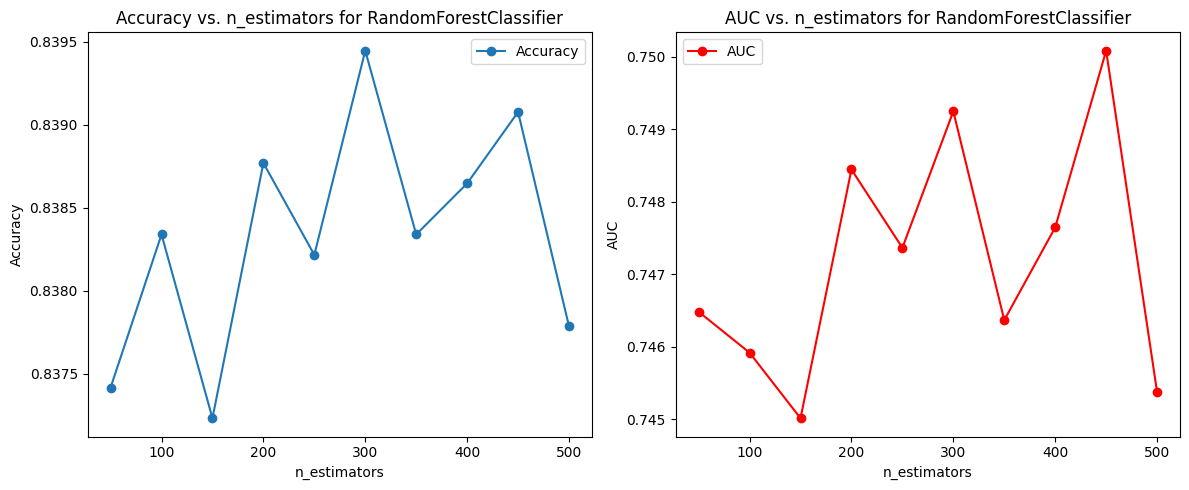

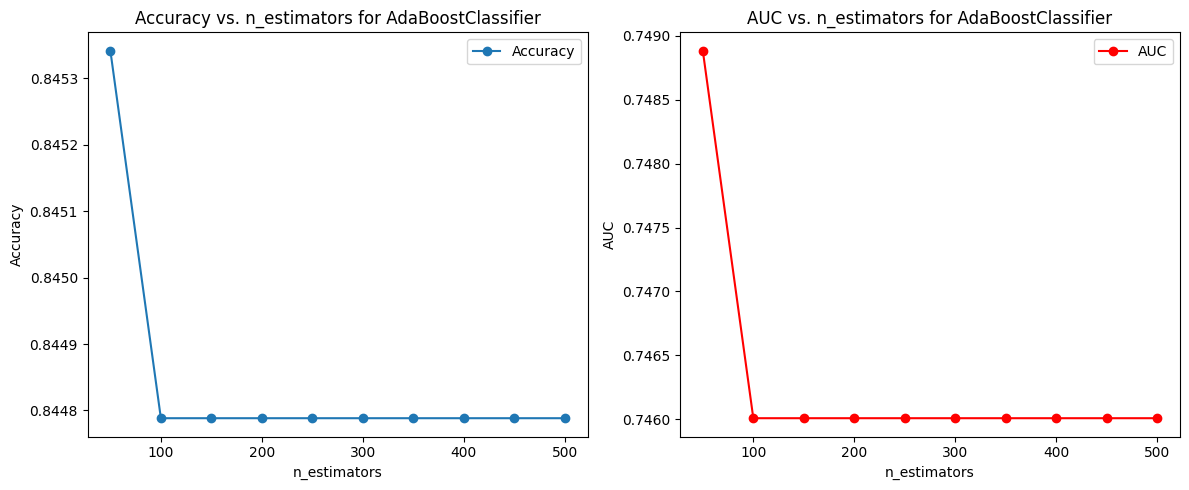

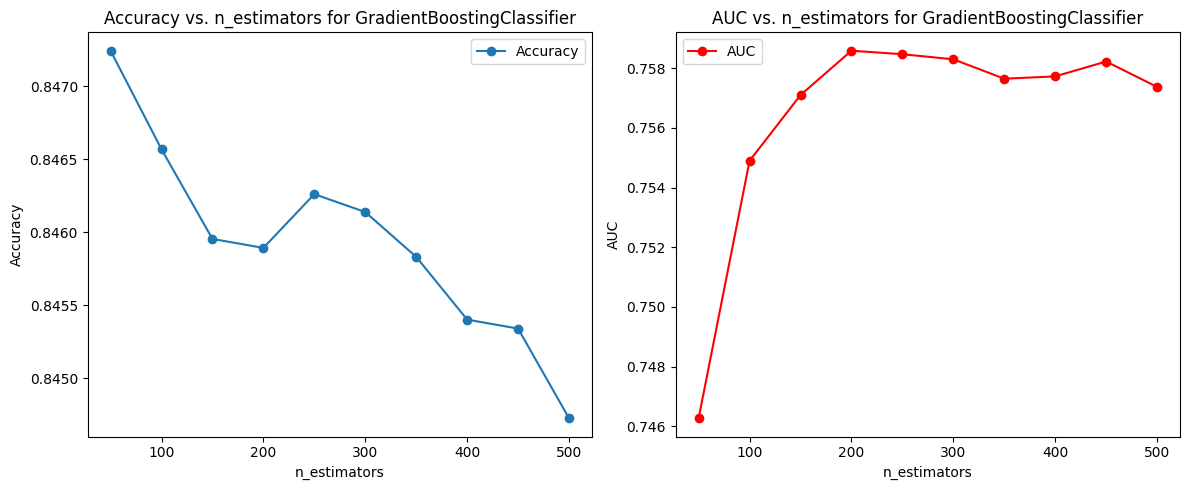

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, y_test are already defined and preprocessed

def evaluate_estimators(model_class, X_train, y_train, X_test, y_test, n_estimators_range):
    accuracies, aucs = [], []
    for n_estimators in n_estimators_range:
        model = model_class(n_estimators=n_estimators)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, predictions))
        aucs.append(roc_auc_score(y_test, predictions))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(n_estimators_range, accuracies, label='Accuracy', marker='o')
    plt.title(f'Accuracy vs. n_estimators for {model_class.__name__}')
    plt.xlabel('n_estimators')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(n_estimators_range, aucs, label='AUC', marker='o', color='red')
    plt.title(f'AUC vs. n_estimators for {model_class.__name__}')
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.legend()

    plt.tight_layout()
    plt.show()

n_estimators_range = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Evaluate Random Forest
evaluate_estimators(RandomForestClassifier, X_train, y_train, X_test, y_test, n_estimators_range)

# Evaluate AdaBoost
evaluate_estimators(AdaBoostClassifier, X_train, y_train, X_test, y_test, n_estimators_range)

# Evaluate Gradient Boosting
evaluate_estimators(GradientBoostingClassifier, X_train, y_train, X_test, y_test, n_estimators_range)



In [ ]:
# Function to sanitize column names
def sanitize_column_names(dataframe):
    sanitized_columns = dataframe.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '').str.replace(' ', '_')
    return dataframe.rename(columns=dict(zip(dataframe.columns, sanitized_columns)))

# Apply the function to both X_train and X_test
X_train = sanitize_column_names(X_train)
X_test = sanitize_column_names(X_test)


<ipython-input-22-d551c7affabf>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sanitized_columns = dataframe.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '').str.replace(' ', '_')
<ipython-input-22-d551c7affabf>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sanitized_columns = dataframe.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '').str.replace(' ', '_')
<ipython-input-22-d551c7affabf>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sanitized_columns = dataframe.columns

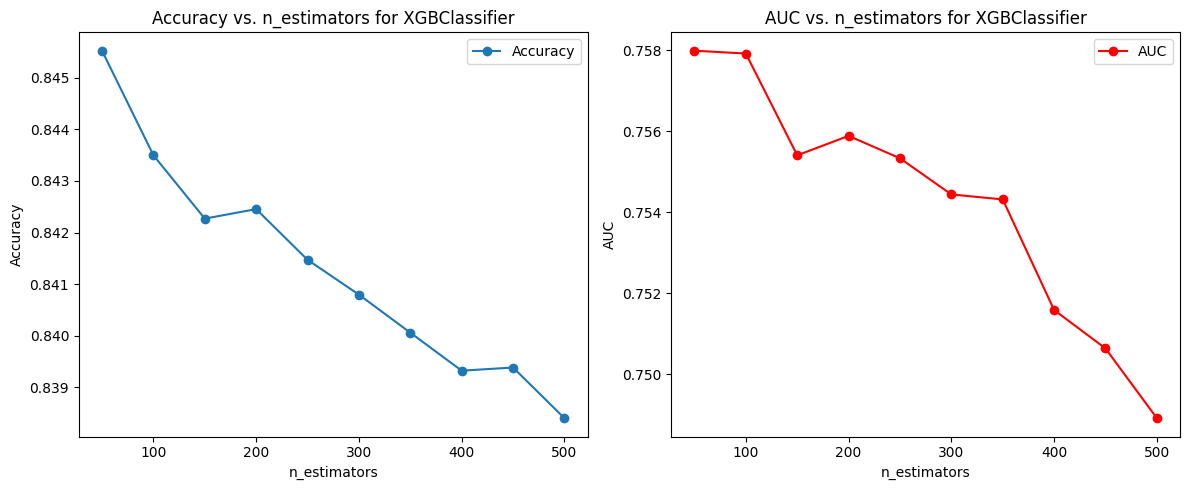

In [ ]:
# Assuming you've already defined evaluate_estimators and set n_estimators_range
evaluate_estimators(XGBClassifier, X_train, y_train, X_test, y_test, n_estimators_range)


In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_auc = roc_auc_score(y_test, rf_predictions)

# AdaBoost
ab_model = AdaBoostClassifier(random_state=101)
ab_model.fit(X_train, y_train)
ab_predictions = ab_model.predict(X_test)
ab_accuracy = accuracy_score(y_test, ab_predictions)
ab_auc = roc_auc_score(y_test, ab_predictions)

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=101)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_auc = roc_auc_score(y_test, gb_predictions)

# XGBoost
xgb_model = XGBClassifier(random_state=101)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_auc = roc_auc_score(y_test, xgb_predictions)

# Create a DataFrame to hold the results
performance_df = pd.DataFrame({
    'Random Forest': {'Accuracy': rf_accuracy, 'AUC': rf_auc},
    'AdaBoost': {'Accuracy': ab_accuracy, 'AUC': ab_auc},
    'Gradient Boost': {'Accuracy': gb_accuracy, 'AUC': gb_auc},
    'XGBoost': {'Accuracy': xgb_accuracy, 'AUC': xgb_auc}
}).T

# Print out the DataFrame
print(performance_df)


                Accuracy       AUC
Random Forest   0.838769  0.748353
AdaBoost        0.845341  0.748884
Gradient Boost  0.846570  0.754896
XGBoost         0.843499  0.757914


In [ ]:
# Use DataFrame to see the best model in one view
data = {
    'Random Forest': {'Accuracy': rf_accuracy, 'AUC': rf_auc},
    'AdaBoost': {'Accuracy': ab_accuracy, 'AUC': ab_auc},
    'Gradient Boost': {'Accuracy': gb_accuracy, 'AUC': gb_auc},
    'XGB': {'Accuracy': xgb_accuracy, 'AUC': xgb_auc}
}

# Create a DataFrame
performance_df = pd.DataFrame(data)

# Transpose it to get the desired format
performance_df = performance_df.T

# Print out the table
print(performance_df)


                Accuracy       AUC
Random Forest   0.838769  0.748353
AdaBoost        0.845341  0.748884
Gradient Boost  0.846570  0.754896
XGB             0.843499  0.757914


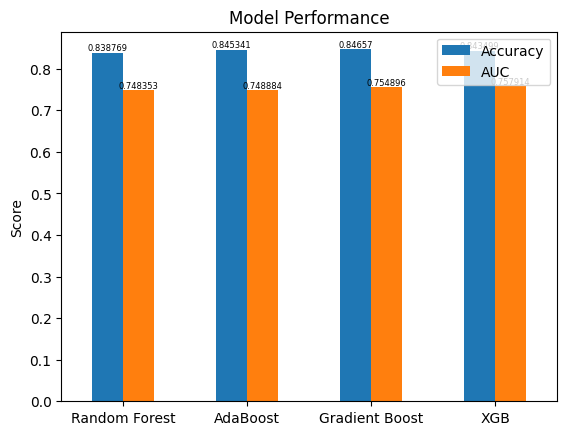

In [ ]:
# Plotting the final result
ax = performance_df.plot(kind='bar', y=['Accuracy', 'AUC'])
plt.title('Model Performance')
plt.ylabel('Score')
plt.xticks(rotation=0)

# Annotating each bar
for container in ax.containers:
    ax.bar_label(container, size = 6)
plt.show()